# Library Gate Counts
#### This working with visualization and processing with the library gate counts.

In [1]:
import pandas as pd
import numpy as np

In [2]:
gateCounts = pd.read_csv(r'../data/LibraryGateCounts.csv')
gateCounts['Date'] = gateCounts['Date'].apply(pd.to_datetime)

- The gate counts are taken twice a day, once at open and once at close.
- Jackson Library: College Avenue entrance (CLG)
- Jackson Library: EUC Connector entrance (CON)

A gate number increases by one if a person regardless of the direction traveled. The calculation below is based upon the average of the differences between the numbers at open and at close.



In [3]:
gateCounts['Patrons'] =\
((gateCounts['CLG-CLOSE'] - gateCounts['CLG-OPEN']) + (gateCounts['CON-CLOSE'] - gateCounts['CON-OPEN']))/2
gateCounts.head()

,Date,CLG-OPEN,CLG-CLOSE,CON-OPEN,CON-CLOSE,Patrons
0,2017-01-01,NaN,NaN,NaN,NaN,NaN
1,2017-01-02,NaN,NaN,NaN,NaN,NaN
2,2017-01-03,1710647.0,1710872.0,3337038.0,3337880.0,533.5
3,2017-01-04,1710872.0,1711067.0,3337880.0,3338632.0,473.5
4,2017-01-05,1711067.0,1711258.0,3338632.0,3339526.0,542.5


In [4]:
gateCounts.iloc[1,0]

Timestamp('2017-01-02 00:00:00')

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

manually mapping colors to days

In [6]:
dayColors = [
    'red',
    'orange',
    'yellow',
    'green',
    'blue',
    'indigo',
    'violet'
    ]
#Rotating the colors to get the rainbow to appear correctly.
dayColors = dayColors[5:]+ dayColors[:5]

In [7]:
import calendar

Some interesting correlations to the visuals below:
- 01/17/17: Classes begin
- 03/11/17: Spring Break begins
- 03/20/17: Spring Break ends
- 05/03/17: Reading day
- 05/04/17: Finals start
- 05/12/17: Commencement

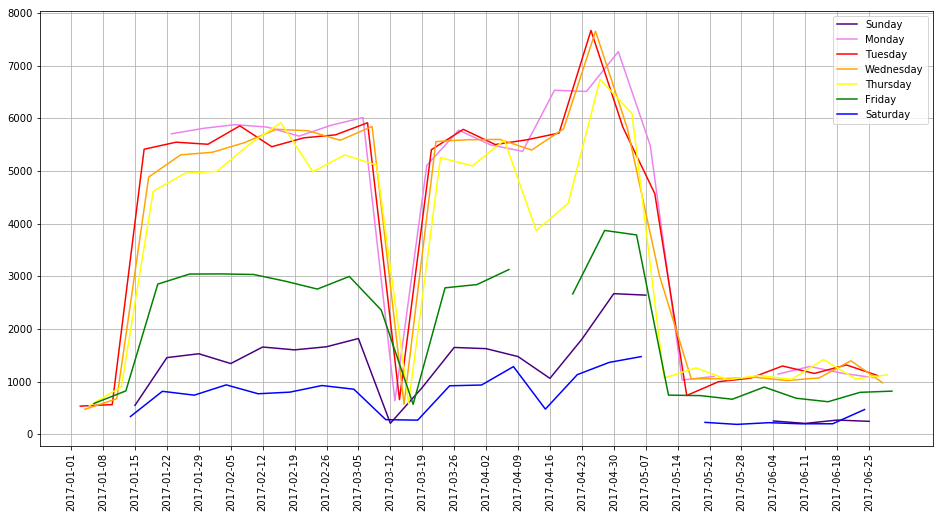

In [8]:
plt.figure(figsize=(16,8))
plt.grid(b=True)
plt.xticks(gateCounts.index.values[::7], gateCounts.Date.dt.strftime("%Y-%m-%d")[::7], rotation=90)
for i in range(7):
    plt.plot(gateCounts.index.values[i::7],gateCounts['Patrons'][i::7].values,\
                c=dayColors[i],\
                label=calendar.day_name[gateCounts.iloc[i,0].weekday()]);
plt.legend();

Correlating gate count to weather.

In [9]:
weatherData = pd.read_csv(r'../data/1052640.csv',low_memory=False,usecols =['DATE','HOURLYWETBULBTEMPF','HOURLYPrecip'])

In [10]:
weatherData['DATE'] = weatherData['DATE'].apply(pd.to_datetime)

The unique values here show that there might be some suspect data. (See issue 21 for details)

In [11]:
weatherData.iloc[:,2].unique()

array(['T', '0.00', nan, '0.01', '0.03', '0.02', '0.05', '0.06', '0.10',
       '0.08', '0.14', '0.12', '0.09', '0.21', '0.22', '0.04', '0.11',
       '0.03s', '0.07s', '0.09s', '0.07', '0.20', '0.23', '0.40', '0.45',
       '0.47', '0.24', '0.25', '0.26', '0.16', '0.17', '0.30', '0.31',
       '0.04s', '0.34', '0.42', '0.49', '0.13', '0.16s', '0.19', '0.18',
       '0.36', '0.38', '0.02s', '0.15', '0.33', '0.39', '0.41', '0.84',
       '0.85', '0.81', '0.35s', '0.29', '0.26s', '0.54', '0.28', '0.17s',
       '0.46', '0.32', '0.60', '0.44s', '0.68', '0.92', '0.98', '0.82',
       '1.52', '2.02', '2.05', '2.09', '0.99', '0.94', '0.06s', '0.65',
       '0.62', '0.37', '0.10s', '0.50', '0.52', '0.56', '0.05s', '0.35'], dtype=object)

Creating a custom function to convert the values to numbers. `pd.to_numeric()` might work, but would prefer to convert the 'T' to a 0.001 to indicate trace amounts of precipitation. Also, values with an s would be converted to non-numeric.

In [12]:
def precipConvert(val):
    if str(val)[-1] == 's':
        return float(val[:-1])
    elif val == 'T':
        return 0.001
    else:
        return val

testing custom function

In [13]:
testList = ['0.32s','T',0.32,np.nan]
for val in testList:
    print precipConvert(val)
    print type(precipConvert(val))

0.32
<type 'float'>
0.001
<type 'float'>
0.32
<type 'float'>
nan
<type 'float'>


In [14]:
weatherData['HOURLYPrecip'].apply(precipConvert).apply(pd.to_numeric).unique()

array([  1.00000000e-03,   0.00000000e+00,              nan,
         1.00000000e-02,   3.00000000e-02,   2.00000000e-02,
         5.00000000e-02,   6.00000000e-02,   1.00000000e-01,
         8.00000000e-02,   1.40000000e-01,   1.20000000e-01,
         9.00000000e-02,   2.10000000e-01,   2.20000000e-01,
         4.00000000e-02,   1.10000000e-01,   7.00000000e-02,
         2.00000000e-01,   2.30000000e-01,   4.00000000e-01,
         4.50000000e-01,   4.70000000e-01,   2.40000000e-01,
         2.50000000e-01,   2.60000000e-01,   1.60000000e-01,
         1.70000000e-01,   3.00000000e-01,   3.10000000e-01,
         3.40000000e-01,   4.20000000e-01,   4.90000000e-01,
         1.30000000e-01,   1.90000000e-01,   1.80000000e-01,
         3.60000000e-01,   3.80000000e-01,   1.50000000e-01,
         3.30000000e-01,   3.90000000e-01,   4.10000000e-01,
         8.40000000e-01,   8.50000000e-01,   8.10000000e-01,
         3.50000000e-01,   2.90000000e-01,   5.40000000e-01,
         2.80000000e-01,

The temperatures here seem to be ok without transformation.

In [15]:
weatherData['HOURLYWETBULBTEMPF'].unique()

array([ 38.,  39.,  40.,  41.,  43.,  44.,  45.,  46.,  47.,  48.,  nan,
        42.,  49.,  50.,  51.,  52.,  35.,  37.,  33.,  30.,  27.,  28.,
        29.,  26.,  24.,  31.,  32.,  25.,  23.,  22.,  21.,  19.,  18.,
        17.,  16.,  15.,  14.,  13.,  11.,  10.,  20.,  12.,   7.,   6.,
        34.,  36.,  53.,  55.,  56.,  58.,  59.,  61.,  60.,  54.,  57.,
        62.,  64.,  63.,  66.,  67.,  69.,  68.,  65.,  70.,  71.,  72.,
        74.,  73.,  75.,  76.,  77.,  78.,  79.,  80.,  82.,  81.,  83.])

Testing correlative data with bokeh example code.
from http://bokeh.pydata.org/en/0.11.1/docs/user_guide/quickstart.html

In [16]:
from bokeh.plotting import figure, output_file, show, output_notebook

In [17]:
weatherDates = np.array(weatherData['DATE'], dtype=np.datetime64)
gateDates = np.array(gateCounts['Date'], dtype=np.datetime64)

In [18]:
window_size = 30
window = np.ones(window_size)/float(window_size)

In [19]:
#output_file("library_weather.html", title="Weather and Gate Counts in Jackson Library")
output_notebook()
p = figure(width=800, height=350, x_axis_type="datetime")

Loading BokehJS ...

In [20]:
precipFormatted = weatherData['HOURLYPrecip'].apply(precipConvert).apply(pd.to_numeric)

In [21]:
p.line(weatherDates,weatherData['HOURLYWETBULBTEMPF'].values * 100,legend='Temp in F')
p.circle(weatherDates,precipFormatted * 1000,color='blue',alpha=0.2, legend='Precipitation')
p.circle(gateDates, gateCounts['Patrons'].values, color='red', legend='Gate Count')


#p.title = "Library Gate Counts vs. Weather"
p.legend.location = "top_left"
p.grid.grid_line_alpha=0
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Gate Count'
p.ygrid.band_fill_color="gray"
p.ygrid.band_fill_alpha = 0.1


This graph is not formatted correctly, but it does show how the functionality might work.

In [22]:
show(p)

### More interactions between weather and gate count:

In [24]:
gateCounts.head()

,Date,CLG-OPEN,CLG-CLOSE,CON-OPEN,CON-CLOSE,Patrons
0,2017-01-01,NaN,NaN,NaN,NaN,NaN
1,2017-01-02,NaN,NaN,NaN,NaN,NaN
2,2017-01-03,1710647.0,1710872.0,3337038.0,3337880.0,533.5
3,2017-01-04,1710872.0,1711067.0,3337880.0,3338632.0,473.5
4,2017-01-05,1711067.0,1711258.0,3338632.0,3339526.0,542.5


In [58]:
dailyTempMin = weatherData.set_index('DATE').groupby(pd.TimeGrouper('D'))['HOURLYWETBULBTEMPF'].min()
dailyTempMax = weatherData.set_index('DATE').groupby(pd.TimeGrouper('D'))['HOURLYWETBULBTEMPF'].max()
dailyTempMean = weatherData.set_index('DATE').groupby(pd.TimeGrouper('D'))['HOURLYWETBULBTEMPF'].mean()

In [87]:
dailyTempMin.to_csv(r'../data/dailyTempMin.csv')
dailyTempMax.to_csv(r'../data/dailyTempMax.csv')
dailyTempMean.to_csv(r'../data/dailyTempMean.csv')

In [97]:
dailyTempMinCSV = pd.read_csv(r'../data/dailyTempMin.csv',names=('date','temp'),index_col=0,parse_dates=True)
dailyTempMaxCSV = pd.read_csv(r'../data/dailyTempMax.csv',names=('date','temp'),index_col=0,parse_dates=True)
dailyTempMeanCSV = pd.read_csv(r'../data/dailyTempMean.csv',names=('date','temp'),index_col=0,parse_dates=True)

In [116]:
barWidth = 1
weatherGraph = figure(plot_width=800, plot_height=350,x_axis_type='datetime')
weatherGraph.vbar(dailyTempMaxCSV['temp'].index.values,barWidth,dailyTempMaxCSV['temp'],dailyTempMeanCSV['temp'])
show(weatherGraph)